# Convolution Neural Networks - MNIST Dataset

> Joseph P. Vantassel, Texas Advanced Computing Center - The University of Texas at Austin

## Install Required Python Packages

For this example you will need several Python packages, you can use the cell below to install them. Be sure to restart your Jupyter kernel once the installation is complete, by going to `Kernel > Restart Kernel and Clear All Outputs ...`. Once your kernel restarts you can continue with the cell below the `Import Required Python Packages` header below.

In [ ]:
!pip install -r requirements.txt

## Import Required Python Packages

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

mpl.rcParams["font.size"]=8

## Import and Visualize Data

In [2]:
data = keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = data

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


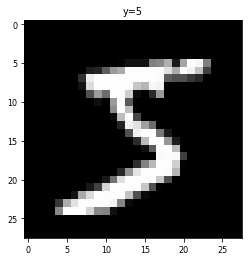

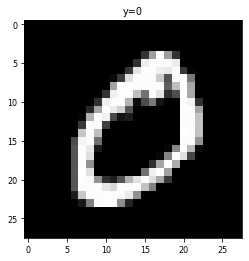

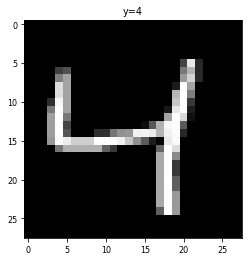

In [4]:
for idx in range(3):
    plt.imshow(x_train[idx], cmap="binary_r")
    plt.title(f"y={y_train[idx]}")
    plt.show()

## Preprocess

### Image Preperation

- Calculate mean and std and store for later.
- Normalize image inputs.

In [5]:
x_mean, x_std = np.mean(x_train), np.std(x_train)
print(f"mean={x_mean:.2f}, std={x_std:.2f}")
x_train_norm = (x_train - x_mean)/x_std
print(f"mean={np.mean(x_train_norm):.2f}, std={np.std(x_train_norm):.2f}")

mean=33.32, std=78.57
mean=-0.00, std=1.00


### Output Preperation

- One-hot encoding

In [6]:
y_train_one_hot = np.zeros((y_train.size, 10), dtype=int)
for row, col in enumerate(y_train):
    y_train_one_hot[row, col] = 1

### Check

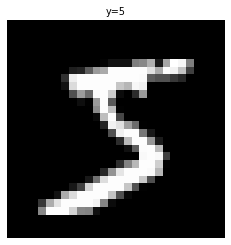

5 [0 0 0 0 0 1 0 0 0 0]


In [7]:
idx = 0
plt.imshow(x_train_norm[idx], cmap="binary_r")
plt.axis("off")
plt.title(f"y={y_train[idx]}")
plt.show()
print(y_train[idx], y_train_one_hot[idx])

## Develop Network Architecture

In [8]:
def get_model():
    inputs = keras.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, kernel_size=3, strides=2, activation="relu")(inputs)
    x = layers.Conv2D(64, kernel_size=3, activation="relu")(x)
    x = layers.Conv2D(64, kernel_size=3, activation="relu")(x)
    x = layers.Conv2D(10, kernel_size=3, activation="relu")(x)
    b, h, w, c = x.shape
    x = layers.AveragePooling2D(pool_size=(h, w))(x)
    x = layers.Flatten()(x)
    return keras.Model(inputs, x)
model = get_model()

### Define Loss Function

- Categorical Cross Entropy on Logits

In [9]:
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0, reduction="auto")

In [10]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

In [11]:
model.compile(optimizer=optimizer, loss=loss)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 13, 13, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 10)          5770      
                                                                 
 average_pooling2d (AverageP  (None, 1, 1, 10)         0         
 ooling2D)                                                       
                                                             

In [13]:
# Hyperparameters
batch_size = 64
epochs = 10
validation_split = 0.2

history = model.fit(x_train_norm, y_train_one_hot, validation_split=validation_split, epochs=epochs)

Epoch 1/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.5512 - val_loss: 0.1789
Epoch 2/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.1103 - val_loss: 0.0823
Epoch 3/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0800 - val_loss: 0.0742
Epoch 4/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0652 - val_loss: 0.0542
Epoch 5/10
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0531 - val_loss: 0.0660
Epoch 6/10
1500/1500 [==============================] - 68s 45ms/step - loss: 0.0469 - val_loss: 0.0451
Epoch 7/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0422 - val_loss: 0.0512
Epoch 8/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0381 - val_loss: 0.0553
Epoch 9/10
1500/1500 [==============================] - 32s 22ms/step - loss: 0.0348 - val_loss: 0.0390
Epoch 10/10
1500/1500 [==============================] - 32s 21m

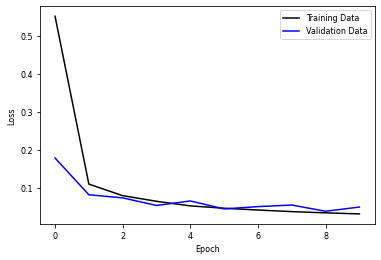

In [14]:
plt.plot(history.epoch, history.history["loss"], color="black", label="Training Data")
plt.plot(history.epoch, history.history["val_loss"], color="blue", label="Validation Data")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

### View Results

In [15]:
y_test_predicted = model.predict((x_test - x_mean)/x_std)
y_test_prob = keras.layers.Softmax(axis=-1)(y_test_predicted)

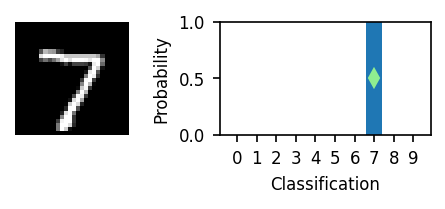

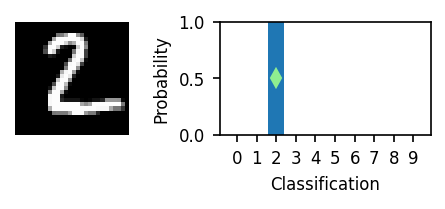

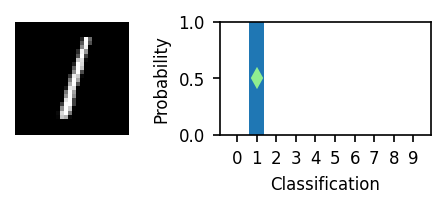

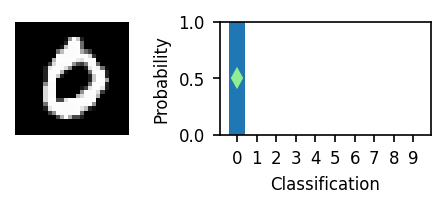

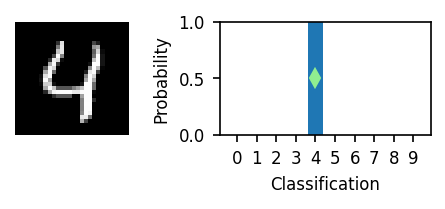

In [16]:
for idx in range(5):
    fig, axs = plt.subplots(ncols=2, figsize=(4, 1), dpi=150)
    ax = axs[0]
    ax.imshow(x_test[idx], cmap="binary_r")
    ax.axis("off")

    ax = axs[1]
    ax.bar(np.arange(10), y_test_prob[idx])
    ax.set_xticks(range(10))
    ax.plot(y_test[idx], 0.5, marker="d", color="lightgreen")
    ax.set_xticks(range(10))
    ax.set_ylim(0, 1)
    ax.set_xlabel("Classification")
    ax.set_ylabel("Probability")
    plt.show()

## Calculate Prediction Accuracy

In [17]:
y_pred = np.argmax(y_test_prob, axis=-1)
accuracy = np.sum(y_test == y_pred)/len(y_pred)
print(f"Test Accuracy: {accuracy*100:.1f}%")

Test Accuracy: 98.6%


## Failed Predictions

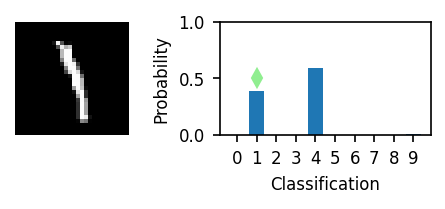

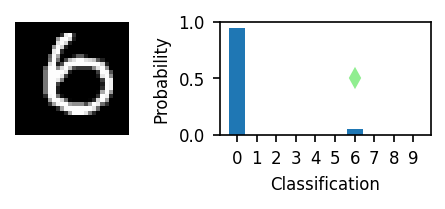

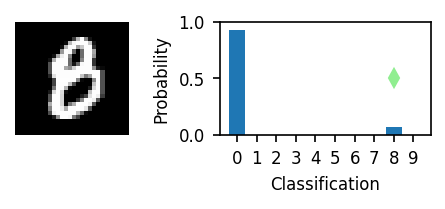

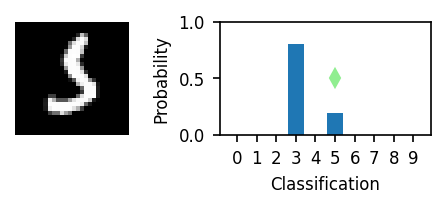

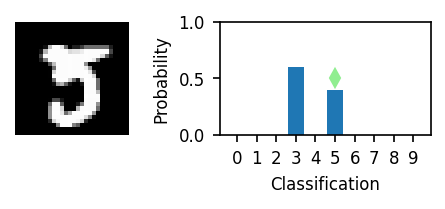

In [18]:
idxs = np.argwhere(y_test != y_pred).flatten()

nidxs = 5
count = 0
for idx in idxs:
    fig, axs = plt.subplots(ncols=2, figsize=(4, 1), dpi=150)
    ax = axs[0]
    ax.imshow(x_test[idx], cmap="binary_r")
    ax.axis("off")

    ax = axs[1]
    ax.bar(np.arange(10), y_test_prob[idx])
    ax.plot(y_test[idx], 0.5, marker="d", color="lightgreen")
    ax.set_xticks(range(10))
    ax.set_ylim(0, 1)
    ax.set_xlabel("Classification")
    ax.set_ylabel("Probability")
    plt.show()
    count += 1
    
    if count == nidxs:
        break